Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

Problem Statement

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

Objective

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

Research Question

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

Importing Libraries

In [72]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 466.4 kB/s eta 0:00:20
   -- ------------------------------------- 0.5/9.6 MB 466.4 kB/s eta 0:00:20
   -- ------------------------------------- 0.5/9.6 MB 466.4 kB/s eta 0:00:20
   --- ------------------------------------ 0.8/9.6 MB 466.0 kB/s eta 0:00:19
   --- ------------------------------------ 0.8/9.6 MB 466.0 kB/s eta 0:00:19
   --- ------------------------------------ 0.8/9.6 MB 466.0 kB/s eta 0:00:19
   ---- ----------------------------------- 1.0/9.6 MB 470.4 kB/s eta 0:00:19
   ---- --------------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\ASUS\Python312\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

Loading the Data

In [2]:
df = pd.read_csv("E:/Projects/drivers revenue/Yellow_Trip.csv")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
df.shape

(24648499, 18)

Exploratory Data Analysis

In [5]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']  =pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [8]:
df['Duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['Duration'] = df['Duration'].dt.total_seconds()/60
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.0,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.0,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.0,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.5,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.5,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24648494,NaN,2020-12-31 23:44:35,2021-01-01 00:01:22,NaN,9.22,NaN,NaN,143,20,NaN,32.49,0.0,0.5,8.16,0.00,0.3,43.95,2.5,16.783333
24648495,NaN,2020-12-31 23:41:36,2020-12-31 23:50:32,NaN,4.79,NaN,NaN,4,262,NaN,13.22,0.0,0.5,3.65,0.00,0.3,20.17,2.5,8.933333
24648496,NaN,2020-12-31 23:01:17,2020-12-31 23:40:37,NaN,28.00,NaN,NaN,210,78,NaN,69.31,0.0,0.5,2.75,6.12,0.3,78.98,0.0,39.333333
24648497,NaN,2020-12-31 23:31:29,2020-12-31 23:44:22,NaN,7.08,NaN,NaN,148,129,NaN,35.95,0.0,0.5,2.75,0.00,0.3,39.50,0.0,12.883333


In [9]:
df = df[['passenger_count','payment_type','fare_amount','trip_distance','Duration']]
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
24648494,NaN,NaN,32.49,9.22,16.783333
24648495,NaN,NaN,13.22,4.79,8.933333
24648496,NaN,NaN,69.31,28.00,39.333333
24648497,NaN,NaN,35.95,7.08,12.883333


In [10]:
df.isnull().sum()

passenger_count    809568
payment_type       809568
fare_amount             0
trip_distance           0
Duration                0
dtype: int64

In [11]:
(809568/len(df))*100

3.2844515197456854

In [12]:
df.dropna(inplace = True)
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
24549234,1.0,2.0,33.0,11.30,26.050000
24549235,1.0,1.0,9.0,2.18,8.216667
24549236,1.0,1.0,9.5,2.52,8.133333
24549237,1.0,1.0,4.5,0.59,2.700000


In [13]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
24549234,1,2,33.0,11.30,26.050000
24549235,1,1,9.0,2.18,8.216667
24549236,1,1,9.5,2.52,8.133333
24549237,1,1,4.5,0.59,2.700000


In [14]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,Duration
2064,1,2,7.0,0.00,0.000000
2451,1,1,52.0,0.00,0.200000
2456,2,1,9.5,1.70,13.066667
2476,1,1,4.0,0.40,3.083333
3358,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
24549232,3,2,6.0,0.82,6.433333
24549233,1,1,7.0,1.83,6.183333
24549235,1,1,9.0,2.18,8.216667
24549236,1,1,9.5,2.52,8.133333


In [15]:
df.drop_duplicates(inplace = True)

In [16]:
df.shape

(7664923, 5)

In [17]:
# Check the distribution of passengers 
df['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.563550
2    0.188741
3    0.071604
5    0.065982
6    0.046057
4    0.038558
0    0.025484
7    0.000011
8    0.000007
9    0.000006
Name: proportion, dtype: float64

In [ ]:
# Check the distribution of payment
df['payment_type'].value_counts(normalize = True)

payment_type
1    0.650786
2    0.328071
3    0.012383
4    0.008758
5    0.000002
Name: proportion, dtype: float64

In [19]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count']>0) & (df['passenger_count']<6)]

In [20]:
df.shape

(6967089, 5)

In [21]:
# Change Payment type into Card & Cash
df['payment_type'].replace([1,2],['Card', 'Cash'],inplace = True)

In [22]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
24549227,1,Card,29.5,10.63,18.400000
24549228,1,Cash,9.5,2.13,13.016667
24549231,1,Cash,19.0,5.50,19.583333
24549234,1,Cash,33.0,11.30,26.050000


In [23]:
df.describe()

,passenger_count,fare_amount,trip_distance,Duration
count,6.967089e+06,6.967089e+06,6.967089e+06,6.967089e+06
mean,1.775153e+00,1.993017e+01,5.322195e+00,2.874741e+01
std,1.204124e+00,1.599324e+01,8.142600e+01,3.048749e+02
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-5.312312e+05
25%,1.000000e+00,1.000000e+01,1.860000e+00,1.143333e+01
50%,1.000000e+00,1.550000e+01,3.480000e+00,1.781667e+01
75%,2.000000e+00,2.450000e+01,6.770000e+00,2.601667e+01
max,5.000000e+00,6.964000e+03,1.673295e+05,8.525117e+03


In [24]:
df = df[df['fare_amount']>0]
df=df[df['trip_distance']>0]
df=df[df['Duration']>0]

In [25]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
24549227,1,Card,29.5,10.63,18.400000
24549228,1,Cash,9.5,2.13,13.016667
24549231,1,Cash,19.0,5.50,19.583333
24549234,1,Cash,33.0,11.30,26.050000


{'whiskers': [<matplotlib.lines.Line2D at 0x151edc3dc40>,
 'caps': [<matplotlib.lines.Line2D at 0x151edc3e1e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x151afc06330>],
 'medians': [<matplotlib.lines.Line2D at 0x151edc3e7b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x151edc3ea80>],
 'means': []}

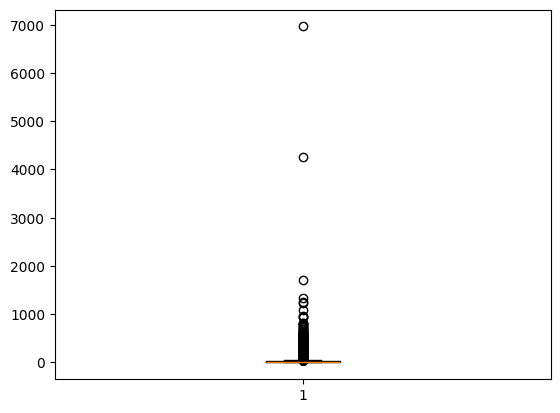

In [26]:
# Checking the outliers
plt.boxplot(df['fare_amount'])

In [27]:
# Using IQR to remove outliers
for col in ['fare_amount','trip_distance','Duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [28]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
24549227,1,Card,29.5,10.63,18.400000
24549228,1,Cash,9.5,2.13,13.016667
24549231,1,Cash,19.0,5.50,19.583333
24549234,1,Cash,33.0,11.30,26.050000


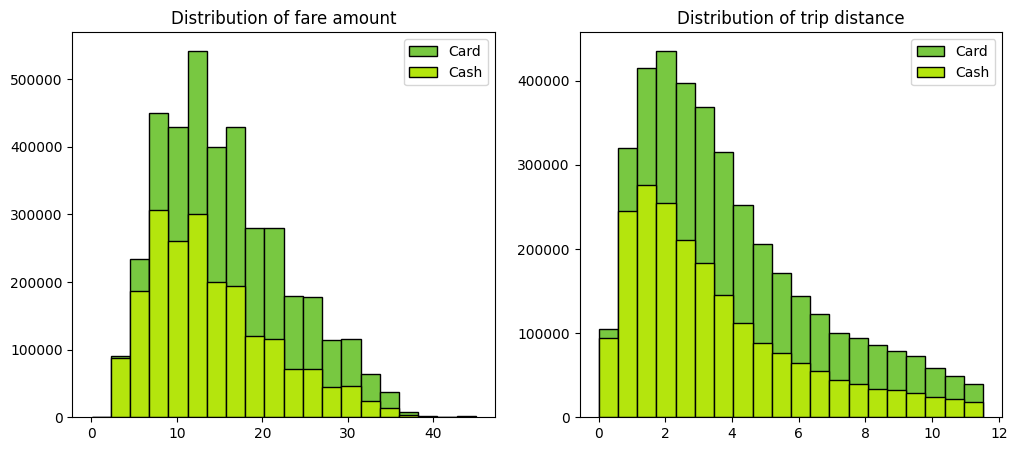

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#78C841', label = 'Card')
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#B4E50D', label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type'] == 'Card']['trip_distance'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#78C841', label = 'Card')
plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#B4E50D', label = 'Cash')
plt.legend()
plt.show()

In [30]:
df.groupby('payment_type').agg({'fare_amount' : ['mean', 'std'], 'trip_distance' : ['mean', 'std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           15.782874  7.342618      3.924750  2.630124
Cash           14.144397  7.136891      3.452551  2.559576

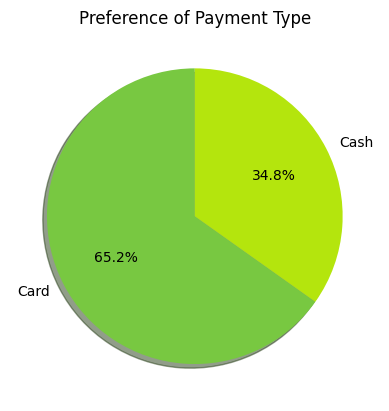

In [31]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index, startangle = 90, shadow = True, autopct = '%1.1f%%', colors = ['#78C841', '#B4E50D'])
plt.show()

In [32]:
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [33]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [34]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,2180136,37.054752
1,Card,2,813387,13.824759
2,Card,3,335424,5.701045
3,Card,4,179883,3.057387
4,Card,5,325791,5.537317
5,Cash,1,1229010,20.888908
6,Cash,2,425122,7.225600
7,Cash,3,162468,2.761393
8,Cash,4,90192,1.532951
9,Cash,5,142140,2.415887


In [35]:
df_passenger = pd.DataFrame(columns = ['payment_type', 1,2,3,4,5])
df_passenger['payment_type'] = ['card', 'Cash']
df_passenger.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df_passenger.iloc[1,1:] = passenger_count.iloc[5:,-1]
df_passenger

,payment_type,1,2,3,4,5
0,card,37.054752,13.824759,5.701045,3.057387,5.537317
1,Cash,20.888908,7.2256,2.761393,1.532951,2.415887


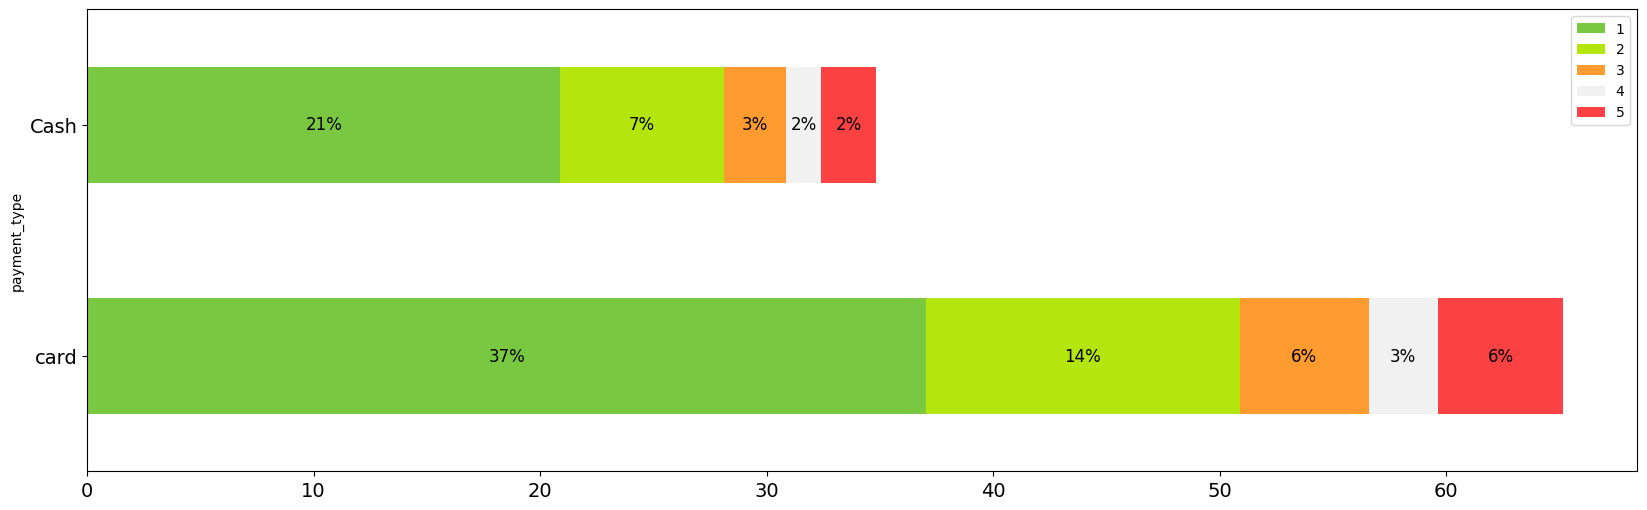

In [36]:
fig, ax = plt.subplots(figsize=(20,6))
df_passenger.plot(x= 'payment_type', kind = 'barh', stacked = True, ax = ax, color = ['#78C841', '#B4E50D', '#FF9B2F', '#F1F1F1', '#FB4141'], fontsize=14)

# Add Percentage text
for a in ax.patches:
    width = a.get_width()
    height = a.get_height()
    x, y = a.get_xy()
    ax.text(x + width/2,
           y + height/2,
           '{:.0f}%'.format(width),
           horizontalalignment = 'center',
           verticalalignment = 'center',
           fontsize=12)

Null hypothesis: There is no difference in average fare between customers who use credit cards and customers who use cash.

Alternate hypothesis: There is a difference in average fare between customers who use credit cards and customers who use cash

In [37]:
print(df.columns)

Index(['passenger_count', 'payment_type', 'fare_amount', 'trip_distance',
       'Duration'],
      dtype='object')


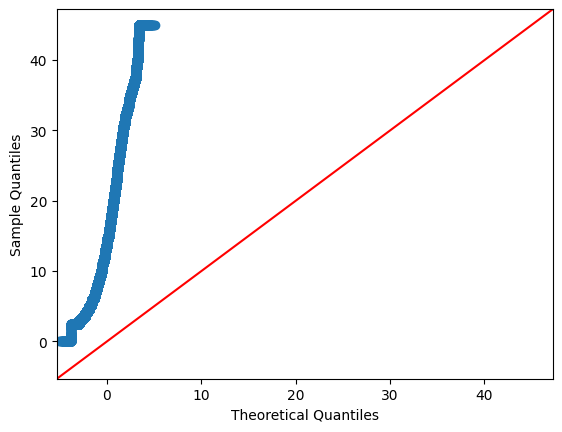

In [38]:
sm.qqplot(df['fare_amount'], line = '45')
plt.show()

In [40]:
card_sample = df[df['payment_type'] == 'Card']['fare_amount']
cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']

In [41]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print('T statistic', t_stats, 'p-value', p_value)

T statistic 262.6385877195428 p-value 0.0
